In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [40]:
truth = './data/processed/truth.txt'
pred = './data/processed/predictions.txt'

df_truth = pd.read_csv(truth, header=None, names=['class'])
df_pred = pd.read_csv(pred, header=None, names=['class'])

In [41]:
df_truth, df_pred

(   class
 0   Jedi
 1   Jedi
 2   Sith
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Sith
 97  Sith
 98  Jedi
 99  Sith
 
 [100 rows x 1 columns],
    class
 0   Sith
 1   Sith
 2   Jedi
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Jedi
 97  Jedi
 98  Sith
 99  Jedi
 
 [100 rows x 1 columns])

In [42]:
def generate_confusion_matrix(truth, pred, true_label, negative_label):
    confusion_matrix = np.array([
        [0, 0],
        [0, 0]
    ])

    for i in range(len(truth)):
        if truth['class'][i] == true_label and pred['class'][i] == true_label: # TP
            confusion_matrix[0][0] += 1
        elif truth['class'][i] == negative_label and pred['class'][i] == negative_label: # TN
            confusion_matrix[1][1] += 1
        elif truth['class'][i] == true_label and pred['class'][i] == negative_label: # FP
            confusion_matrix[0][1] += 1
        elif truth['class'][i] == negative_label and pred['class'][i] == true_label: # FN
            confusion_matrix[1][0] += 1

    return confusion_matrix

def generate_metrics(confusion_matrix):
    TP = confusion_matrix[0][0]
    TN = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    precision = float(f'{TP / (TP + FP):.2f}')
    recall = float(f'{TP / (TP + FN):.2f}')
    f1_score = float(f'{2 * (precision * recall) / (precision + recall):.2f}')
    accuracy = float(f'{(TP + TN) / (TP + TN + FP + FN):.2f}')

    return precision, recall, f1_score, accuracy



In [43]:
j_confusion_matrix = generate_confusion_matrix(df_pred, df_truth, 'Jedi', 'Sith')
s_confusion_matrix = generate_confusion_matrix(df_pred, df_truth, 'Sith', 'Jedi')

j_precision, j_recall, j_f1_score, j_accuracy = generate_metrics(j_confusion_matrix)
s_precision, s_recall, s_f1_score, s_accuracy = generate_metrics(s_confusion_matrix)

j_total = len(df_truth[df_truth['class'] == 'Jedi'])
s_total = len(df_truth[df_truth['class'] == 'Sith'])

In [44]:
df_metrics = pd.DataFrame({
    'precision': [j_precision, s_precision],
    'recall': [j_recall, s_recall],
    'f1_score': [j_f1_score, s_f1_score],
    'total': [j_total, s_total],
}, index=['Jedi', 'Sith'])

df_metrics.loc['Accuracy'] = ['', '', j_accuracy, j_total + s_total]
print(df_metrics)

confusion_matrix = generate_confusion_matrix(df_truth, df_pred, 'Jedi', 'Sith')
print(confusion_matrix)

# [[25 24]
# [30 21]]

         precision recall  f1_score  total
Jedi          0.45   0.51      0.48     49
Sith          0.47   0.41      0.44     51
Accuracy                       0.46    100
[[25 24]
 [30 21]]


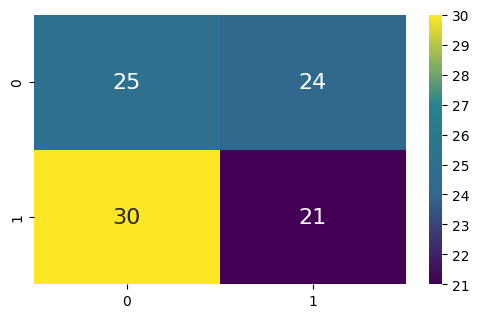

In [45]:
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ['#440054', '#31688E', '#27828E', '#FDE724'])

plt.figure(figsize=(6, 3.5))
sns.heatmap(confusion_matrix, annot=True, annot_kws={
  'size': 16
}, cmap=custom_cmap)
plt.show()

### Ex01

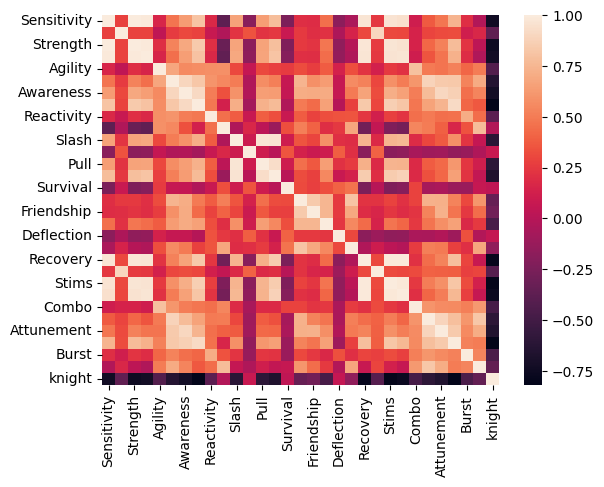

In [46]:
train_knight = pd.read_csv('./knights/Training_knight.csv')
train_knight_copy = train_knight.copy()
train_knight_copy['knight'] = train_knight_copy['knight'].astype('category').cat.codes
correlation_matrix = train_knight_copy.corr()

sns.heatmap(correlation_matrix)
plt.show()

### Ex02

Variances (Percentage):
 [4.58421409e+01 1.85859493e+01 8.28509352e+00 6.45142213e+00
 5.48386555e+00 3.71818930e+00 2.30156326e+00 1.81023494e+00
 1.42442888e+00 1.20711312e+00 9.20552515e-01 8.69689986e-01
 7.06577916e-01 6.17402461e-01 3.87583778e-01 2.94214444e-01
 2.30330374e-01 1.77012148e-01 1.26290311e-01 1.14250254e-01
 1.01812998e-01 9.47801318e-02 6.34772590e-02 5.72829463e-02
 4.44416251e-02 3.41811382e-02 2.32343630e-02 2.08343089e-02
 4.34004455e-03 1.36737573e-03 3.42674882e-04]

Cumulative Variances (Percentage):
[ 45.84214092  64.42809024  72.71318376  79.16460589  84.64847144
  88.36666075  90.668224    92.47845895  93.90288783  95.11000095
  96.03055346  96.90024345  97.60682136  98.22422383  98.6118076
  98.90602205  99.13635242  99.31336457  99.43965488  99.55390513
  99.65571813  99.75049826  99.81397552  99.87125847  99.91570009
  99.94988123  99.9731156   99.9939499   99.99828995  99.99965733
 100.        ]


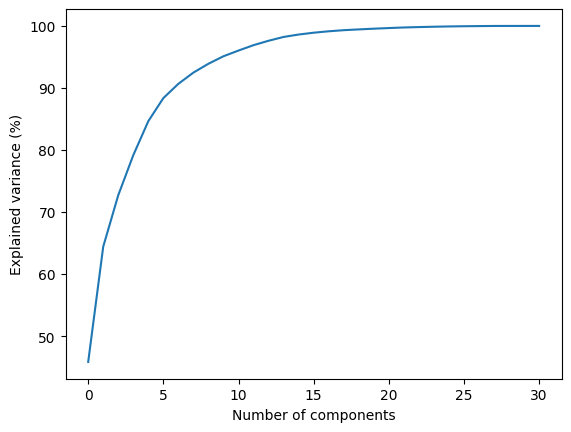

In [47]:
train_knight_scaled = (train_knight_copy - train_knight_copy.mean()) / train_knight_copy.std()

pca = PCA()
pca.fit_transform(train_knight_scaled)

variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(variances)

np.set_printoptions(suppress=False)
print(f"Variances (Percentage):\n {variances * 100}\n")
print(f"Cumulative Variances (Percentage):\n{cumulative_variances * 100}")

plt.plot(cumulative_variances * 100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.show()

### Ex03

In [48]:
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(train_knight_scaled.values, i)
                          for i in range(len(train_knight_scaled.columns))]
vif_data["Tolerance"] = [1 / vif_data['VIF'][i] for i in range(len(vif_data['VIF']))]
vif_data.set_index(train_knight_scaled.columns, inplace=True)

vif_data

# print(vif_data[vif_data['VIF'] < 5])

,VIF,Tolerance
Sensitivity,4808.152794,0.000208
Hability,10.537201,0.094902
Strength,4723.434102,0.000212
Power,496.048814,0.002016
Agility,8.038144,0.124407
Dexterity,60.084312,0.016643
Awareness,73.864884,0.013538
Prescience,66.110418,0.015126
Reactivity,4.031148,0.248068
Midi-chlorien,14.915314,0.067045


### Ex04 (Decision Tree Implementation from Scratch)

In [119]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value
  

  def is_leaf_node(self):
    return self.value is not None

class DecisionTree:
  def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.root = None

  def fit(self, X, y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)

  def _grow_tree(self, X, y, depth=0):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(y))

    # Check the stopping criteria
    if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
      leaf_value = self._most_common_label(y)
      return Node(value=leaf_value)

    # Find the best split
    feature_indices = np.random.choice(n_feats, self.n_feats, replace=False)
    best_feature, best_threshold = self._best_split(X, y, feature_indices)

    # Create the sub trees
    left_indices, right_indices = self._split(X[:, best_feature], best_threshold)
    left = self._grow_tree(X[left_indices, :], y[left_indices], depth+1)
    right = self._grow_tree(X[right_indices, :], y[right_indices], depth+1)
    return Node(best_feature, best_threshold, left, right)


  def _best_split(self, X, y, feature_indices):
    best_gain = -1
    split_index, split_threshold = None, None

    for i in feature_indices:
      X_column = X[:, i]
      thresholds = np.unique(X_column)

      for threshold in thresholds:
        gain = self._information_gain(X_column, y, threshold)
        if gain > best_gain:
          best_gain = gain
          split_index = i
          split_threshold = threshold

    return split_index, split_threshold

  def _information_gain(self, X_column, y, threshold):
    """
      Calculate the information gain of a split\n
      IG = E(Parent) - [Weighted Average] * E(Children)
    """
    parent_entropy = self._entropy(y)

    left_indices, right_indices = self._split(X_column, threshold)
    if (len(left_indices) == 0 or len(right_indices) == 0):
      return 0

    n = len(y)
    n_samples_left, n_samples_right = len(left_indices), len(right_indices)
    entropy_left, entropy_right = self._entropy(y[left_indices]), self._entropy(y[right_indices])
    child_entropy = (n_samples_left / n) * entropy_left + (n_samples_right / n) * entropy_right

    information_gain = parent_entropy - child_entropy
    return information_gain


  def _split(self, X_column, threshold):
    left_indices = np.argwhere(X_column <= threshold).flatten()
    right_indices = np.argwhere(X_column > threshold).flatten()
    return left_indices, right_indices
  
  def _entropy(self, y):
    """
      Calculate the entropy of a label array\n
      E = Entropy = -sum(p(X)) * log(p(X))\n
      p(X) = #(x) / n
    """
    counter = Counter(y)
    entropy = 0

    for x in counter:
      p_x = counter[x] / len(y)
      entropy += -p_x * np.log2(p_x)

    return entropy

  def _most_common_label(self, y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


  def predict(self, X):
    return np.array([self._traverse_tree(x, self.root) for x in X])

  def _traverse_tree(self, x, node):
    if node.is_leaf_node():
      return node.value

    if x[node.feature] <= node.threshold:
      return self._traverse_tree(x, node.left)
    return self._traverse_tree(x, node.right)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [130]:
# Knight Dataset
train_data = pd.read_csv('./knights/Training_knight.csv')
validation_data = pd.read_csv('./knights/Validation_knight.csv')

X_train = train_data.values
y_train = train_data['knight'].values

X_validation = validation_data.values
y_validation = validation_data['knight'].values

decision_tree = DecisionTree(max_depth=5)
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_validation)

print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

        Jedi       1.00      1.00      1.00        47
        Sith       1.00      1.00      1.00        73

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [134]:
# Iris Dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

decision_tree = DecisionTree()
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Ex04 (Sklearn)